In [96]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import matplotlib.pyplot as plt

def phix(x):
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def kt(tau):
    tauc = ((ka*2*rm/(ka+kd))**2)/(2*Dt)
    x = ka*((tau/tauc)**(0.5))/kd
    return kon*(1+(ka*phix(x)/kd))

rm=0.005
D = 1
Dt = 2*D
L = 1#1.5
V1 = L**3
N=50
kd= 4.0*math.pi*D*4*rm
ka = 1*kd
kon = (ka*kd)/(ka+kd)
taum = (2./3)*(rm**2)/D
kd= 4.0*math.pi*D*4*rm
factor=1.5
rv = factor*rm
tauv = (2./3)*(rv**2)/D
dtau = tauv - taum
kt2 = kt(dtau)
dt = dtau/1000#fine resolution needed for produce accurate numerical integration
kts = [kt(t) for t in np.arange(0.0,dtau,dt)]
intg = np.trapz(kts,dx=dt)/dtau#/ka
print intg
print taum

0.176084994627
1.66666666667e-05


In [97]:
c = 1./(2*rm)-1./(2*rv)
print c
ks = ka/(1+(c*ka/4/3.14/Dt))
print ks

33.3333333333
0.188471660325


In [87]:
with species_attributes():
     A |B| {'D': str(D), 'radius':str(rm)}

with reaction_rules():#for spa and egfrd
     A + B > B | ka

m = get_model()
spa = np.array(ensemble_simulations(500, 1e-2, y0={"A": N,'B': N}, model=m, solver=("spatiocyte", rm), volume=V1,return_type='array'))
ts = spa[0][:,0]
nas = np.mean(spa[:,:,1],axis=0)

[ 6.74518849] [[ 0.00045837]]
5e-05
0.134903769733


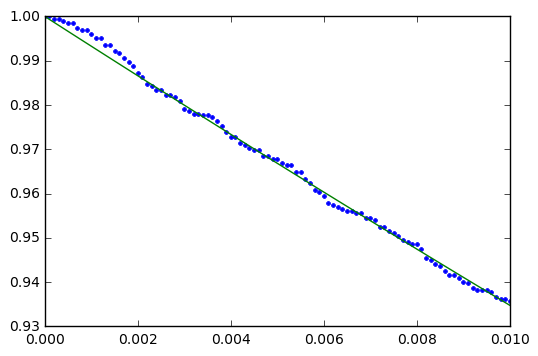

In [88]:
from scipy.optimize import curve_fit
def func(x,k):
    return np.exp(-k*x)
p,cov = curve_fit(func,ts,nas/N)
plt.plot(ts,nas/N,'.',label=str(factor)+'rm')
plt.plot(ts,func(ts,*p))
print p,cov
print dtau
print p[0]*dtau/N/dtau
kaa = p[0]*dtau/N/dtau

In [72]:
with species_attributes():
     A |B| {'D': str(D), 'radius':str(rm)}

with reaction_rules():#for spa and egfrd
     A + B > B | ka

m = get_model()
spa1 = np.array(ensemble_simulations(20, 1, y0={"A": N,'B': N}, model=m, solver=("spatiocyte", rm), volume=V1,return_type='array'))
ts = spa1[0][:,0]
nas1 = np.mean(spa1[:,:,1],axis=0)


In [104]:
with species_attributes():
     A |B| {'D': str(D), 'radius':str(rm)}

with reaction_rules():#for spa and egfrd
     A + B > B | ks

print ka,kaa    
m = get_model()
spa2 = np.array(ensemble_simulations(50, 1, y0={"A": N,'B': N}, model=m, solver=("spatiocyte", rv), volume=V1,return_type='array'))
ts = spa2[0][:,0]
nas2 = np.mean(spa2[:,:,1],axis=0)


0.251327412287 0.134903769733


0.188471660325


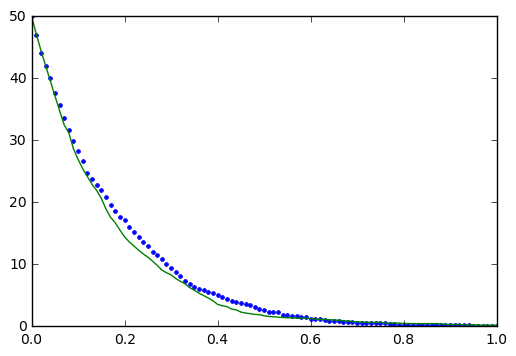

In [105]:
print ks
plt.plot(ts,nas1,'.',label=str(factor)+'rm')
plt.plot(ts,nas2,'-')